# Forest Cover Type Classification

Team work is not required. Everybody implements his/her own code. Please maximise you learning experience by refraining from using LLMs.

In this exercise, we will **predict the forest cover type** (the predominant kind of tree cover) from strictly cartographic variables. 
As in the regression assignment, Y stands for a column vector of "target" values, that is the i-th row of Y contains the desired output for the i-th data point. Contrary to regression, the elements of Y in this classification task are integer values.

We will work with several popular classifiers provided by Scikit-learn package.

## Dataset: Forest cover data
This dataset contains 581012 tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. 

This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

### Data Dictionary

|Variable Name | Description |
|-|-|
| Elevation | Elevation in meters.|
| Aspect | Aspect in degrees azimuth.|
| Slope | Slope in degrees.|
| Horizontal_Distance_To_Hydrology | Horizontal distance to nearest surface water features.|
| Vertical_Distance_To_Hydrology | Vertical distance to nearest surface water features.|
| Horizontal_Distance_To_Roadways | Horizontal distance to nearest roadway.|
| Hillshade_9am | Hill shade index at 9am, summer solstice. Value out of 255.|
| Hillshade_Noon | Hill shade index at noon, summer solstice. Value out of 255.|
| Hillshade_3pm | Hill shade index at 3pm, summer solstice. Value out of 255.|
| Horizontal_Distance_To_Fire_Points | sHorizontal distance to nearest wildfire ignition points.|
| Wilderness_Area1 | Rawah Wilderness Area|
| Wilderness_Area2 | Neota Wilderness Area|
| Wilderness_Area3 | Comanche Peak Wilderness Area|
| Wilderness_Area4 | Cache la Poudre Wilderness Area|
| Soil_Type| Soil_Type1 to Soil_Type40 (Total 40 Types)|
| **Cover_Type** | Forest Cover Type designation. |

**Cover_Type** Integer value between 1 and 7, with the following key:

    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz



## Objective: 

We will **predict different cover types** in different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.

## Content:

1) Load Data
2) Basic Statistics
3) Exploratory Data Analysis
4) Training Models

    4.0) Data Preparation
    
    4a) Logistic Regression
    
    4b) Decision Tree Classifition
    
    4c) Random Forest
    
    4d) K Nearest Neighbor and optional hyper-parameter tuning
    
    4e) Support Vector Machine
    
5) Data Imbalance Problem

    5a) Training with Under-Sampled Data
    
    5b) Training with Over-Sampled Data

In [1]:
# import packages
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

## 1) Load data

- Use ```pandas.read_csv()``` to load the data.

In [2]:
df = pd.read_csv('data/ForestCover.csv')

- Visualize the first and the last 5 rows of the data, using ```.head()``` and ```.tail()```.

In [3]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


## 2) Basic statistics
- Print overall info, using ```.info()```.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

- Print dataframe statistics using ```.describe()```.

In [6]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


- Check if there are missing values, using ```.isnull().sum()```. If yes, drop them or fill them.

In [7]:
df.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


## 3) Exploratory Data Analysis
- Show the category distribution, using ```.value_counts()```.

In [8]:
df.value_counts()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  Hillshade_3pm  Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  Soil_Type30  Soil_Type31  Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type
1859       18      12     67                                11                              90                               211            215             139            792                         

- Visulise this distribution, using ```sns.countplot()```

/var/folders/hw/y61sswm55ss5_mz_3jfglnh03lrr77/T/ipykernel_66240/1386903904.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([cover_type_dict[i] for i in range(1, 8)], rotation=45, ha='right')


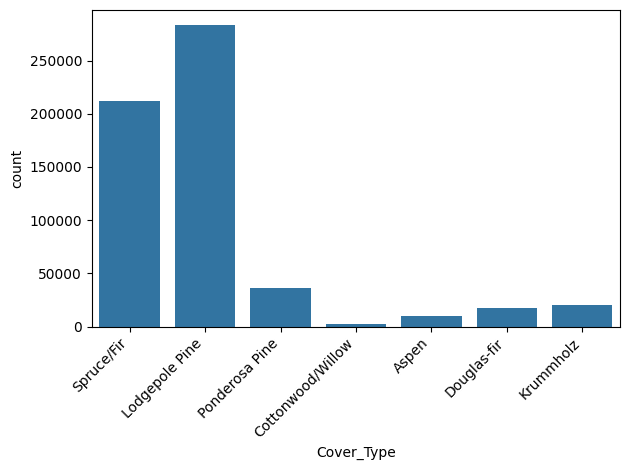

In [9]:
cover_type_dict = {
    1: 'Spruce/Fir',
    2: 'Lodgepole Pine',
    3: 'Ponderosa Pine',
    4: 'Cottonwood/Willow',
    5: 'Aspen',
    6: 'Douglas-fir',
    7: 'Krummholz'
}
ax = sns.countplot(x='Cover_Type', data=df)
ax.set_xticklabels([cover_type_dict[i] for i in range(1, 8)], rotation=45, ha='right')
plt.tight_layout()

### Feature Histograms 
- Visulize data distribution of the first four features via Histograms using ```sns.histplot()```. (Hint: Show four figures using a for loop.)

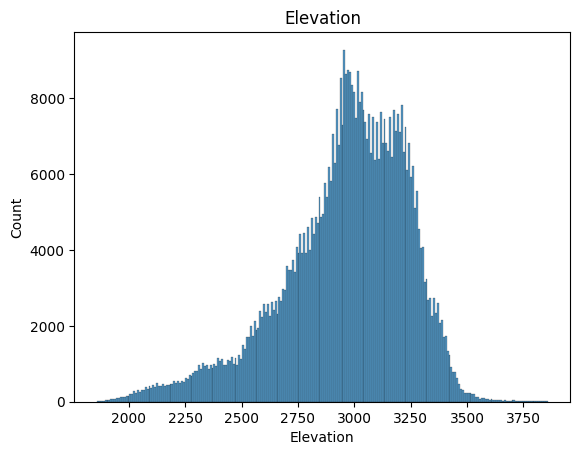

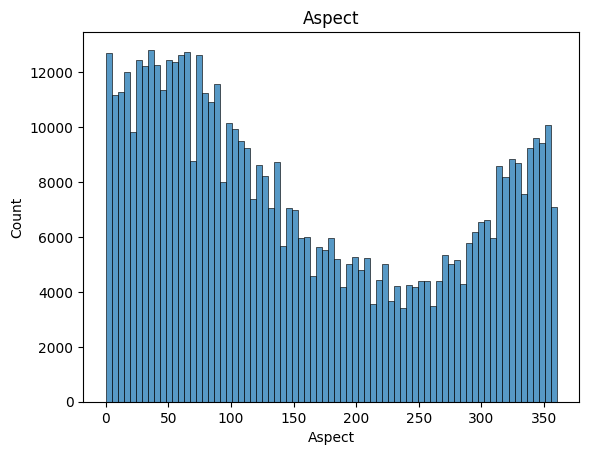

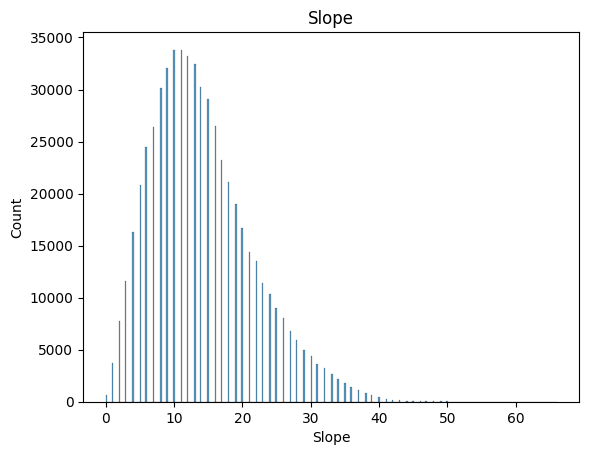

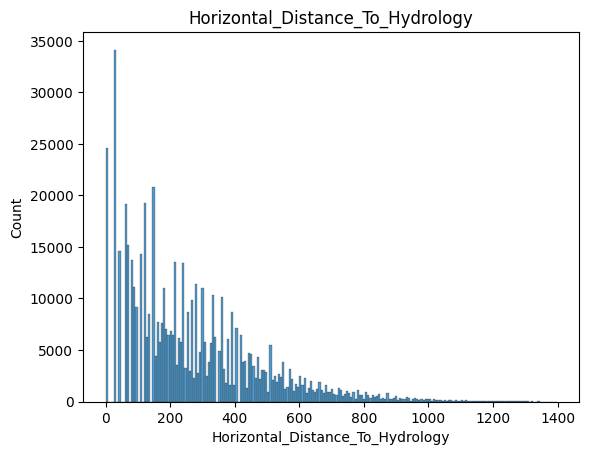

In [10]:
for feature in df.keys()[:4]:
    sns.histplot(df[feature])
    plt.title(feature)
    plt.show()

### Correlation between Variables
- Show correlation .corr() between variables, using ```sns.heatmap()```. (Since 55 columns are too many, please show here a 10x10 heatmap for the first 10 features. )

<Axes: >

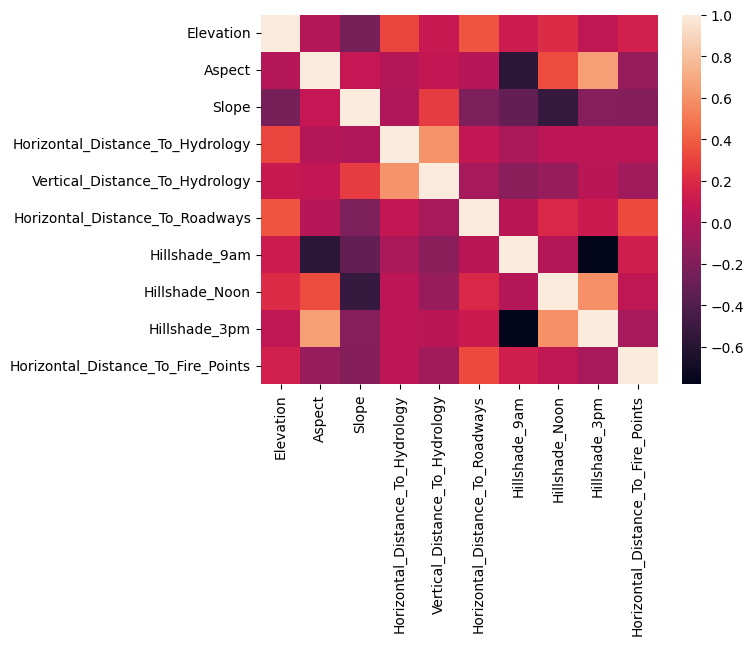

In [11]:
sns.heatmap(df.iloc[:, :10].corr())

### Data Distribution w.r.t. Categories
- Show data distribution w.r.t. categories, using ```sns.boxplot()```. (x-axis: cover type, y-axis: feature variable, please show 10 figures for the first 10 variables.)

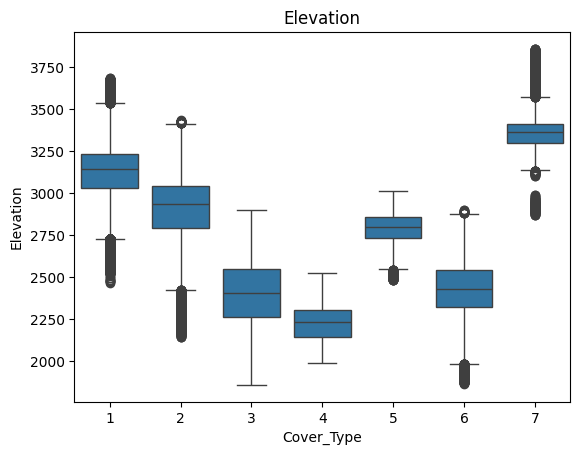

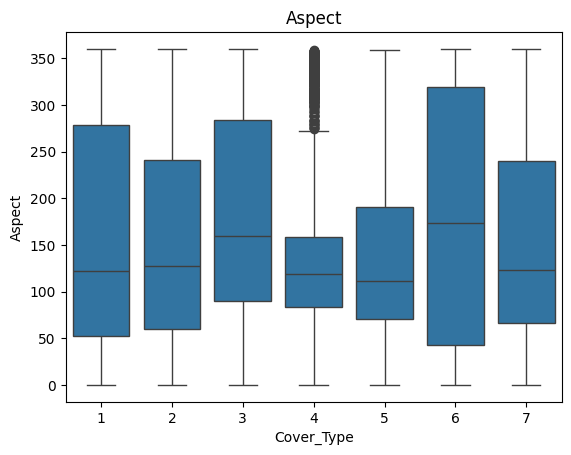

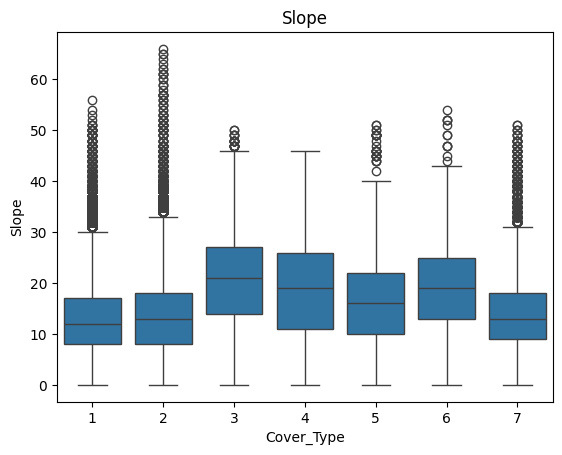

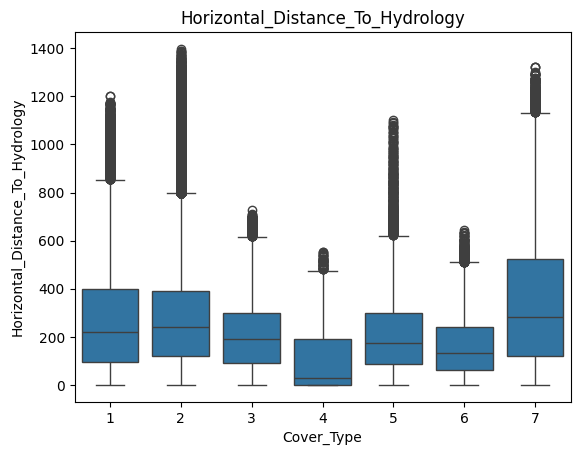

In [12]:
for feature in df.keys()[:4]:
    sns.boxplot(df, x= "Cover_Type", y = feature)
    plt.title(feature)
    plt.show()

- Are there any features which shows not much of variance with respect to classes? Which ones?

- Which features might do good job in the prediction?

## 4) Training Models

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

- Define Feature (as X) and Target (as y)

In [23]:
X = df.drop(columns='Cover_Type').iloc[:, :10]
y = df['Cover_Type']

- Split the data into train (70%) and test (30%), use a random seed. train_test_split()
- Print the size of the train and test set

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42)

In [28]:
X

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


- Normalize the data using ```StandardScaler()```

In [26]:
normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

### 4a) Logistic Regression
- Train the Logistic Regression model LogisticRegression

In [27]:
model_lr = LogisticRegression(solver='sag', n_jobs=-1)
model_lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'sag'
,max_iter,100
,multi_class,'deprecated'


- Predict on the test data

In [31]:
model_lr.predict(X_test)

array([1, 2, 2, ..., 1, 2, 2], shape=(174304,))

- Compute and print performance metrics, using ```accuracy_score()``` to compute the fraction of correctly classified samples.

In [32]:
accuracy_score(y_test, model_lr.predict(X_test))

0.6960941802827244

### 4b) Random Forest
- Train and test with the Random Forest classifier
- Print the accuracy

### 4c) K Nearest Neighbor
- Train and test with the KNN classifier
- Print the accuracy

### Hyperparameter Tuning (optional)

Let's search a better K (e.g. among candidates \[3,5,11\]) for the KNN classifier, using ```GridSearchCV()```.


- define parameter candidates and grid search

- fit the model wtih all grid parameters

- print the best K.

- print the test accuracy with this K.

### 4e) Support Vector Machine
- Train and test with the SVM classifier
- Print the accuracy

(It might take a bit long, around 3 hours if using one cpu core...)

### Conclusion
- Please write your conclusion:

Accuracy score:
- Logistic Regression: 

- Decision Tree: 

- Random Forest: 

- K Nearest Neighbor: 

- K Nearest Neighbor after hypertuning K (optional):

- Support Vector Machine: 

## 5) Data imbalance problem

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

Here you can change the dataset that you use to build your predictive model to have more balanced data.

This change is called sampling your dataset and there are two main methods that you can use to even-up the classes:

1) You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement); 
2) or you can delete instances from the over-represented class, called under-sampling.

Please train Random Forest classifiers with both under-sampled data and over-sampled data, and compare their accuracy scores.

As we have seen in 3), the data is imbalanced.

### 5a) Training with under-sampled data

- print the size of the smallest class

- Undersample all the majority classes so that all classes has the same smallest cardinality.

- check the class distribution of the undersampled data

- Preprocessing data (define X, y; train test split; normalize data)

- Train and test the random forest classifier on under-sampled data
- Print the accuracy

### 5b) Training with over-sampled data

- print the size of the largest class

- Oversample the classes.

- check the class distribution of the oversampled data

- Preprocessing data (define X, y; train test split; normalize data)

- Train and test the random forest classifier on over-sampled data
- Print the accuracy

### Conclusion on imbalanced data solution (with random forest classifier):

Accuracy:

- imbalanced data:

- undersampled data: 

- oversampled data: 

There is a bit of cheating in over-sampling: Some of the data are copied both in train and test set.